<a href="https://colab.research.google.com/github/amira123bd/_Quick_Notes_MLOPS_Certif_Coursera/blob/master/Introduction_to_Machine_Learning_in_Production_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-------------------------------




# Data definition

labeling the data may be inconsistent : for eg if it is about making a box around a detefected part someone will consider all the defected part that are not related as a whole part others will label every part independently.



- Data definition questions?

What is the input x?( description(Structured of unstructured/small or big, features need to be included)

What is the target y?



RMQ:

When you have a small dataset it is critical to have clean labels (in a consistent way).

- Struct Vs unstruct Data

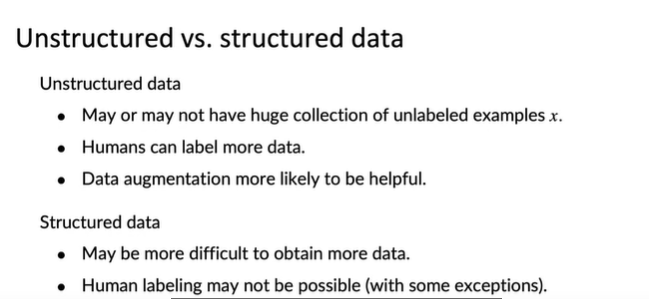








- How to improve the consistency of your label's consistency?

1. Have multiple labelers label the same set of examples.

2. if there is disagreement ==> discussion

3. Repeat until there is no more disagreement.

(Having a class/label to capture uncertainty is a great way to solve disagreement problem for labelers)

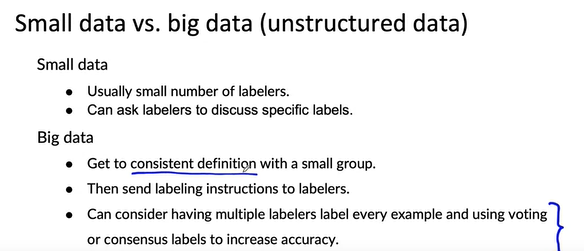


* HLP(Human level performance):

HLP can supports and helps with establshing a more reasonable target.
Like imagine your PO asks for 99% of accuracy and based on HLP you get only 66% of accuracy so you can tell him ' if a human achieved only that accuracy how did you want to get 99% accracy '


# Label & Organize data

**Label the data**

- In-house(Your own team will label the data) vs outsourced(other companies) vs crowdsourced( a platform where a group could label)

**Data Pipelines**

== Data cascades



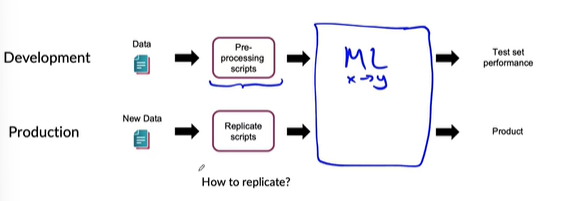


**POC (proof-of-concept)** : means check if the application is workable and worth deploying.

**Production**: after our project utility has been established, we have to use a more sophisticated tools to make sure that the data pipeline is replicable.





# Scoping

**How to choose the problem to work on ?**

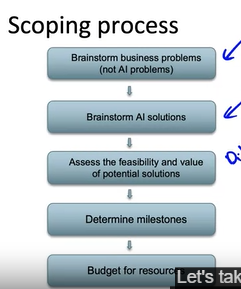


----------------------------------

# LAB: Data Labeling

This lab is about How can data labeling process affects the performance of a classification model. Labeling data is usually a very labor intensive and costly task but it is of great importance.

---------------------------------

Dataset used:

- Unstructured/text dataset

- Comment from 2015 on the top 5 popular YouTube Videos.

- Labeled as Spam or not_spam

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Get the data

In [5]:
Path_to_data='/content/drive/MyDrive/Data/YoutubeData/Files.zip'
Unzipped_file='/content/drive/MyDrive/Data/YoutubeData/file'
import zipfile

#Unzip the file
with zipfile.ZipFile(Path_to_data, 'r') as zip_ref:
    zip_ref.extractall(Unzipped_file)


In [12]:
#Get the 5 csv files
csv_files = [os.path.join(Unzipped_file+'/Files',csv) for csv in os.listdir(Unzipped_file+'/Files')]
#Get the content of each file as a pandas dataframe
pd_dataframes=[pd.read_csv(data) for data in csv_files]
#Concatenate the dataframes to a single one
Data=pd.concat(pd_dataframes)

In [13]:
Data

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


In [15]:
#Rename columns
Data=Data.rename(columns={'CONTENT':'Text','CLASS':'label'})

In [16]:
Data.head()

,COMMENT_ID,AUTHOR,DATE,Text,label
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


Preprocessing

* Check for balanced classes

In [23]:
print(f'data for each class :\n{Data.label.value_counts()}')

data for each class :
1    1005
0     951
Name: label, dtype: int64


<Axes: title={'center': 'Distribution of classes '}, ylabel='label'>

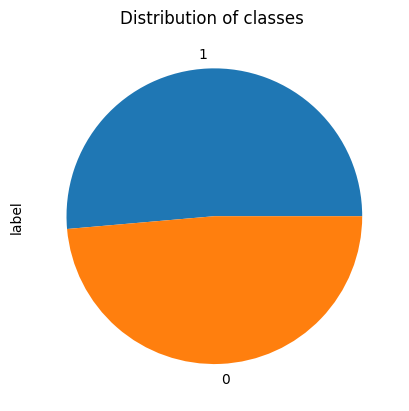

In [24]:
#display a pie chart to get more intuition
Data.label.value_counts().plot.pie(y='label',title='Distribution of classes ')

==> Depending on those results we can easily interpret that class imbalance is not a huge issue.

* Cleaning the data

In [25]:
Data.columns

Index(['COMMENT_ID', 'AUTHOR', 'DATE', 'Text', 'label'], dtype='object')

In [26]:
##DROP UNECESSAT+RY LABELS
columns_to_drop=['COMMENT_ID', 'AUTHOR', 'DATE']
Data=Data.drop(columns_to_drop,axis=1)

In [27]:
Data.head()

,Text,label
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [28]:
Data.shape

(1956, 2)

In [30]:
##SPLIT THE DATA
from sklearn.model_selection import train_test_split

X=Data.drop(['label'],axis=1)
Y=Data['label']

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)


print(f'shape of training data{X_train.shape}')
print(f'shape of test data{X_test.shape}')

shape of training data(1564, 1)
shape of test data(392, 1)


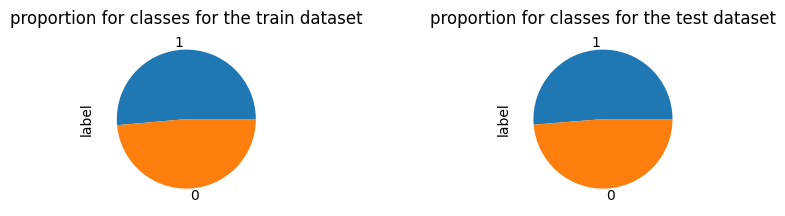

In [33]:
##let's plot and visualize the proportion
plt.subplot(1,3,1)
y_train.value_counts().plot.pie(y='label',title='proportion for classes for the train dataset')


plt.subplot(1,3,3)
y_test.value_counts().plot.pie(y='label',title='proportion for classes for the test dataset')


plt.tight_layout()
plt.show()

==> we are doing well with our balanced classes for both train and test, thank you stratification for being there !!

let's jump to labeling

* Data labeling

let's implement a function in order to compare accuracy for each labeling method

In [35]:
#First of all we have to define an encoding method for the comments here we will use vectorization
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer(ngram_range=(1,2))


In [48]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB


def calculate_accuracy(X_tr, y_tr, X_te=X_test, y_te=y_test,
                       clf=MultinomialNB(), vectorizer=vectorizer):

    # Encode train text
    X_train_vect = vectorizer.fit_transform(X_tr.Text.tolist())

    # Fit model
    clf.fit(X=X_train_vect, y=y_tr)

    # Vectorize test text
    X_test_vect = vectorizer.transform(X_te.Text.tolist())

    # Make predictions for the test set
    preds = clf.predict(X_test_vect)

    # Return accuracy score
    return accuracy_score(preds, y_te)

*Random labeling*

In [49]:
# Calculate random labels
rnd_labels = np.random.randint(0, 2, X_train.shape[0])

# Feed them alongside X_train to calculate_accuracy function
rnd_acc = calculate_accuracy(X_train, rnd_labels)

rnd_acc

0.41836734693877553

*True labeling*

In [50]:

# Feed true labels alongside X_train to calculate_accuracy function
True_acc = calculate_accuracy(X_train, y_train)

True_acc

0.9081632653061225

==> and yeeh as expected we have achieved an accuracy of 90%

*Automatic labeling*


Let's suppose that for some reason you don't have access to the true labels associated with each data point in this dataset. It is a natural idea to think that there are patterns in the data that will provide clues of which are the correct labels. This is of course very dependant on the kind of data you are working with and to even hypothesize which patterns exist requires great domain knowledge.

Notice the word **rules**. In order to perform automatic labeling you will define some rules such as "if the comment contains the word 'free' classify it as spam".


* free - spam comments usually lure users by promoting free stuff

* subs - spam comments tend to ask users to subscribe to some website or channel

* http - spam comments include links very frequently

In [51]:
def labeling_rules_1(x):

    # Convert text to lowercase
    x = x.lower()

    # Define list of rules
    rules = [
        "free" in x,
        "subs" in x,
        "http" in x
    ]

    # If the comment falls under any of the rules classify as SPAM
    if any(rules):
        return 1

    # Otherwise, NO_LABEL
    return -1

In [52]:
# Apply the rules the comments in the train set
labels = [labeling_rules_1(label) for label in X_train.Text]

# Convert to a numpy array
labels = np.asarray(labels)

# Take a look at the automatic labels
labels

array([-1, -1, -1, ...,  1, -1,  1])

In [53]:
# Create the automatic labeled version of X_train by removing points with NO_LABEL label
X_train_al = X_train[labels != -1]

# Remove predictions with NO_LABEL label
labels_al = labels[labels != -1]

print(f"Predictions with concrete label have shape: {labels_al.shape}")

print(f"Proportion of data points kept: {labels_al.shape[0]/labels.shape[0]*100:.2f}%")

Predictions with concrete label have shape: (375,)
Proportion of data points kept: 23.98%


In [54]:
# Compute accuracy when using these labels
iter_1_acc = calculate_accuracy(X_train_al, labels_al)

# Display accuracy
print(f"First iteration of automatic labeling has an accuracy of {iter_1_acc*100:.2f}%")



First iteration of automatic labeling has an accuracy of 51.28%


In [56]:

##Save accuracies in a dictionnary
acc=dict()


In [61]:
# Empty list to save accuracies
rnd_accs = []

for _ in range(10):
    # Add every accuracy to the list
    rnd_accs.append(calculate_accuracy(X_train, np.random.randint(0, 2, X_train.shape[0])))

# Save result of random labels in accs dictionary
acc['random-labels'] = sum(rnd_accs)/len(rnd_accs)

# Print result
print(f"The random labelling method achieved and accuracy of {acc['random-labels']*100:.2f}%")

The random labelling method achieved and accuracy of 52.27%


In [62]:
# Save the result of true labels
acc['true-labels'] = True_acc

print(f"The true labelling method achieved and accuracy of {acc['true-labels']*100:.2f}%")

The true labelling method achieved and accuracy of 90.82%


In [63]:
# Compute accuracy when using these labels
iter_1_acc = calculate_accuracy(X_train_al, labels_al)

# Display accuracy
print(f"First iteration of automatic labeling has an accuracy of {iter_1_acc*100:.2f}%")

# Save the result of the first iteration for automatic labeling
acc['first-iteration'] = iter_1_acc

First iteration of automatic labeling has an accuracy of 51.28%


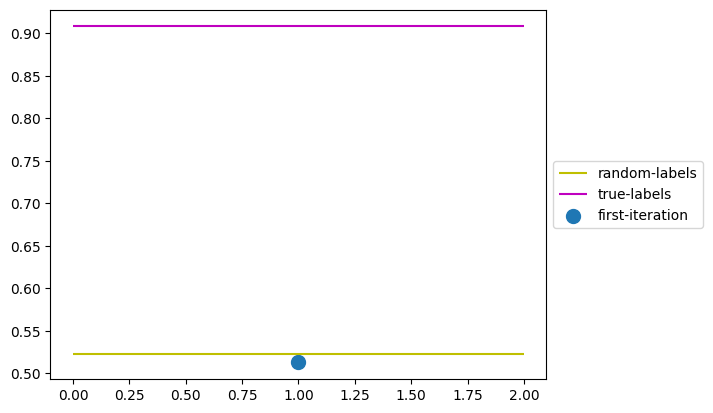

In [66]:
##Ploting accuracies
def plot_accuracies(accs=acc):
    colors = list("rgbcmy")
    items_num = len(accs)
    cont = 1

    for x, y in accs.items():
        if x in ['true-labels', 'random-labels', 'true-labels-best-clf']:
            plt.hlines(y, 0, (items_num-2)*2, colors=colors.pop())
        else:
            plt.scatter(cont, y, s=100)
            cont+=2
    plt.legend(accs.keys(), loc="center left",bbox_to_anchor=(1, 0.5))
    plt.show()

plot_accuracies()

==> as we see for the automated label in the first iteration it is more close to the ransdom label's accuracy.

In [70]:
##Now it's time to perform many iterations in order to make our labels better
def label_given_rules(df, rules_function, name,
                      accs_dict=acc, verbose=True):

    # Apply labeling rules to the comments
    labels = [rules_function(label) for label in df.Text]

    # Convert to a numpy array
    labels = np.asarray(labels)

    # Save initial number of data points
    initial_size = labels.shape[0]

    # Trim points with NO_LABEL label
    X_train_al = df[labels != -1]
    labels = labels[labels != -1]

    # Save number of data points after trimming
    final_size = labels.shape[0]

    # Compute accuracy
    acc = calculate_accuracy(X_train_al, labels)

    # Print useful information
    if verbose:
        print(f"Proportion of data points kept: {final_size/initial_size*100:.2f}%\n")
        print(f"{name} labeling has an accuracy of {acc*100:.2f}%\n")

    # Save accuracy to accuracies dictionary
    accs_dict[name] = acc

    return X_train_al, labels, acc

In [71]:
def labeling_rules_2(x):

    # Convert text to lowercase
    x = x.lower()

    # Define list of rules to classify as NOT_SPAM
    not_spam_rules = [
        "view" in x,
        "song" in x
    ]

    # Define list of rules to classify as SPAM
    spam_rules = [
        "free" in x,
        "subs" in x,
        "gift" in x,
        "follow" in x,
        "http" in x
    ]

    # Classify depending on the rules
    if any(not_spam_rules):
        return 0

    if any(spam_rules):
        return 1

    return -1

Proportion of data points kept: 44.12%

second-iteration labeling has an accuracy of 72.96%



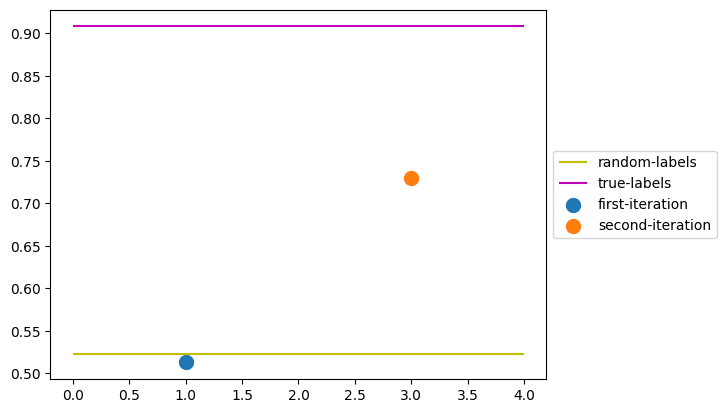

In [72]:
label_given_rules(X_train, labeling_rules_2, "second-iteration")

plot_accuracies()

==> and yees we are doing great  the better our labels are, the better our models will be

==>Also it is important to realize that the process of correctly labeling data is a very complex one. Remember, we can think of each one of the iterations of the automatic labeling process to be a different labeler with different criteria for labeling.